In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def get_extension_filepaths(directory, extension='.txt'):
    txt_filepaths = []
    # 遍歷指定目錄中的所有文件和子文件夾
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # 檢查文件擴展名是否為 .txt
            if filename.endswith(extension):
                # 結合目錄路徑和文件名以獲得完整的文件路徑
                filepath = os.path.join(root, filename)
                # 將文件路徑添加到列表中
                txt_filepaths.append(filepath)
    return txt_filepaths

txt_files_list = get_extension_filepaths("EMG Physical Action Data Set")
print(len(txt_files_list))

80


In [3]:
# 查看資料，並轉存成csv儲存
def read_txt(file_dirs:list):
    for file_dir in file_dirs:
        df = pd.read_csv(file_dir, sep='\t', header=None)
        # print(df.head())
        print(f"{file_dir.split('/')[-1]} shape:{df.shape}")
        # print(df.describe())
        # 儲存資料
        os.makedirs(os.path.dirname(file_dir.replace('txt', 'csv')), exist_ok=True)
        df.to_csv(file_dir.replace('txt', 'csv'), index=False,header=False)

read_txt(txt_files_list)


Elbowing.txt shape:(9772, 8)
Frontkicking.txt shape:(9811, 8)
Hamering.txt shape:(10000, 8)
Headering.txt shape:(10000, 8)
Kneeing.txt shape:(10000, 8)
Pulling.txt shape:(9659, 8)
Punching.txt shape:(9637, 8)
Pushing.txt shape:(9676, 8)
Sidekicking.txt shape:(9829, 8)
Slapping.txt shape:(9788, 8)
Bowing.txt shape:(9830, 8)
Clapping.txt shape:(10000, 8)
Handshaking.txt shape:(9611, 8)
Hugging.txt shape:(9756, 8)
Jumping.txt shape:(10000, 8)
Running.txt shape:(9964, 8)
Seating.txt shape:(10000, 8)
Standing.txt shape:(9725, 8)
Walking.txt shape:(10000, 8)
Waving.txt shape:(10000, 8)
Elbowing.txt shape:(10000, 8)
Frontkicking.txt shape:(9884, 8)
Hamering.txt shape:(10000, 8)
Headering.txt shape:(10000, 8)
Kneeing.txt shape:(10000, 8)
Pulling.txt shape:(10000, 8)
Punching.txt shape:(10000, 8)
Pushing.txt shape:(10000, 8)
Sidekicking.txt shape:(9806, 8)
Slapping.txt shape:(10000, 8)
Bowing.txt shape:(9930, 8)
Clapping.txt shape:(10000, 8)
Handshaking.txt shape:(10000, 8)
Hugging.txt shape:(1

EMG Physical Action Data Set/sub1/Aggressive/csv/Elbowing.csv


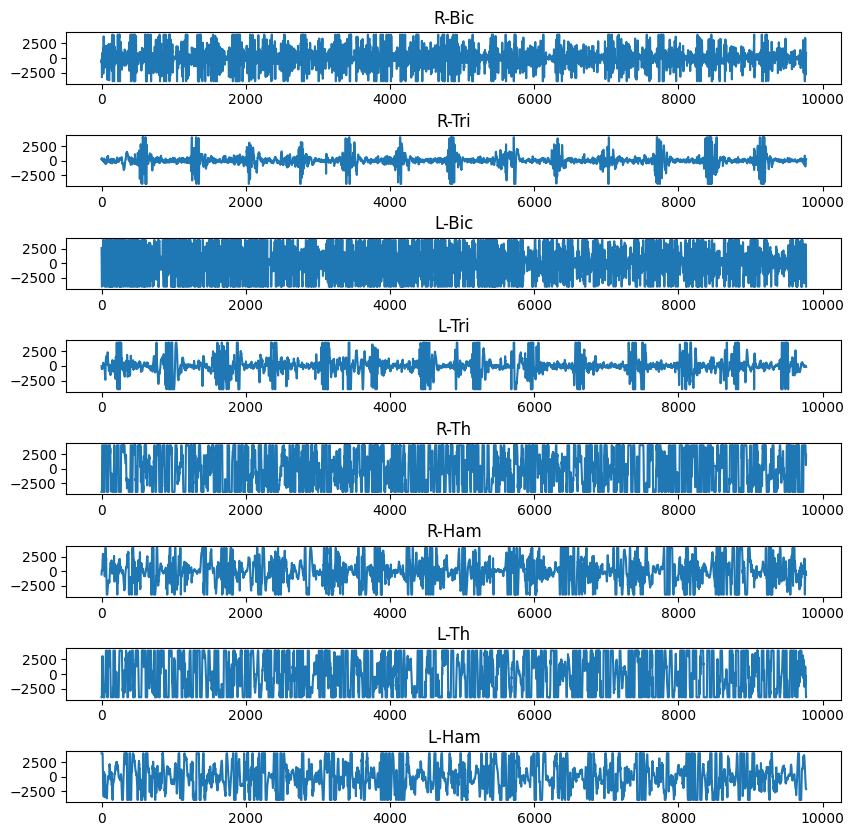

In [4]:
# 繪出肌電圖
def plot_emg(file_dirs:list):
    for file_dir in file_dirs:
        print(file_dir)
        df = pd.read_csv(file_dir, header=None)
        # 字典映射 sEMG channel
        dict = {0:'R-Bic',1:'R-Tri',2:'L-Bic',3:'L-Tri',4:'R-Th',5:'R-Ham',6:'L-Th',7:'L-Ham'}
        plt.figure(figsize=(10, 10))
        plt.subplots_adjust(hspace=1)
        for i in range(8):
            plt.subplot(811+i)
            plt.title(dict[i])
            plt.plot(df[i])
        plt.show()
csv_files_list = get_extension_filepaths("EMG Physical Action Data Set", extension='.csv')
# print(csv_files_list)
plot_emg([csv_files_list[0]])

In [5]:
# 將所有資料合併，取每10比當中的最大值，並在最後一行加上label
def merge_csv(file_dirs):
    data = pd.DataFrame()
    for file_dir in file_dirs:
        df = pd.read_csv(file_dir,names=[f"ch-{i}"for i in range(1,9)])
        print(f"sub:{file_dir.split('/')[-4]} processing_file:{file_dir.split('/')[-1].split('.')[0]} shape:{df.shape}")
        temp = pd.DataFrame()
        for i in range(0,len(df), 10):
            temp = pd.concat([temp, df.iloc[i:i+10].max().to_frame().T], ignore_index=True)
        action = file_dir.split('/')[-1].split('.')[0]
        temp['Action'] = [action]*len(temp)
        # print(temp.head(5))
        data = pd.concat([data, temp], ignore_index=True)
    print(f"data.shape:{data.shape} processing done! save to merged_data.csv")
    data.to_csv("merged_data.csv", index=False)
merge_csv(csv_files_list)

sub:sub1 processing_file:Elbowing shape:(9772, 8)
sub:sub1 processing_file:Frontkicking shape:(9811, 8)
sub:sub1 processing_file:Hamering shape:(10000, 8)
sub:sub1 processing_file:Headering shape:(10000, 8)
sub:sub1 processing_file:Kneeing shape:(10000, 8)
sub:sub1 processing_file:Pulling shape:(9659, 8)
sub:sub1 processing_file:Punching shape:(9637, 8)
sub:sub1 processing_file:Pushing shape:(9676, 8)
sub:sub1 processing_file:Sidekicking shape:(9829, 8)
sub:sub1 processing_file:Slapping shape:(9788, 8)
sub:sub1 processing_file:Bowing shape:(9830, 8)
sub:sub1 processing_file:Clapping shape:(10000, 8)
sub:sub1 processing_file:Handshaking shape:(9611, 8)
sub:sub1 processing_file:Hugging shape:(9756, 8)
sub:sub1 processing_file:Jumping shape:(10000, 8)
sub:sub1 processing_file:Running shape:(9964, 8)
sub:sub1 processing_file:Seating shape:(10000, 8)
sub:sub1 processing_file:Standing shape:(9725, 8)
sub:sub1 processing_file:Walking shape:(10000, 8)
sub:sub1 processing_file:Waving shape:(100

In [3]:
# 讀取合併後的資料
data = pd.read_csv("merged_data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79763 entries, 0 to 79762
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch-1    79763 non-null  float64
 1   ch-2    79763 non-null  float64
 2   ch-3    79763 non-null  float64
 3   ch-4    79763 non-null  float64
 4   ch-5    79763 non-null  float64
 5   ch-6    79763 non-null  float64
 6   ch-7    79763 non-null  float64
 7   ch-8    79763 non-null  float64
 8   Action  79763 non-null  object 
dtypes: float64(8), object(1)
memory usage: 5.5+ MB
None


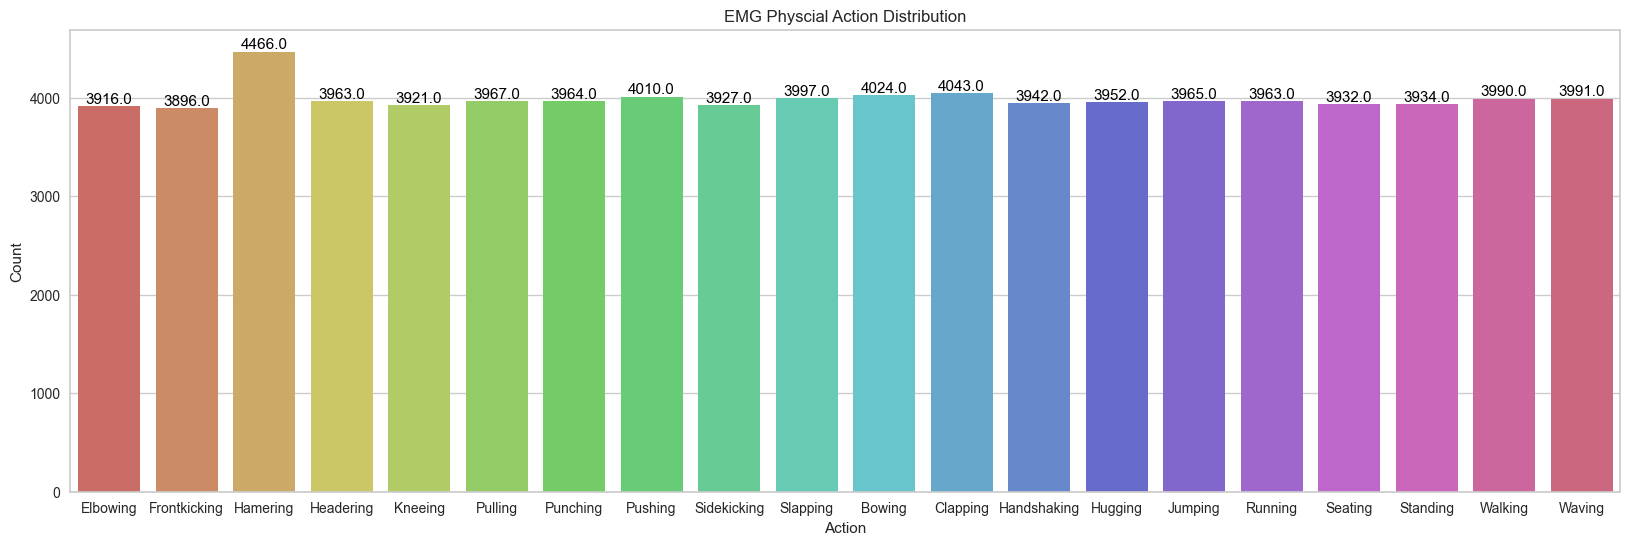

In [4]:
# 設定圖片大小
plt.figure(figsize=(20, 6))

# 繪製計數圖
ax = sns.countplot(x='Action', data=data, palette='hls')
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('EMG Physcial Action Distribution')

# 在每個 bar 上顯示數值
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()